In [2]:
import datetime as dt
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import csv
import itertools
import json
import psaw
import time

from timeit import default_timer as timer
from networkx.classes.function import degree_histogram

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.generators.random_graphs import watts_strogatz_graph
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length
from networkx.algorithms.cluster import average_clustering

In [3]:
G = nx.read_gexf('subreddit_network.gexf')

In [4]:
def plot_degree_pdf(name, g, log=False, left=None, right=None):
    num_nodes = len(g.nodes())
    pdf = [n / num_nodes for n in degree_histogram(g)]
    degree = range(len(pdf))
    plt.scatter(degree, pdf)
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.xlim(left=left, right=right)
    plt.xlabel('degree')
    plt.ylabel('p')
    plt.title(name)
    plt.show()
    

def plot_weighted_degree_dist(name, g, log=False, left=None, right=None):
    num_nodes = len(g.nodes())
    
    degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
    degree_hist = np.unique(degree_sequence, return_counts=True)
    plt.scatter(*degree_hist)
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.xlim(left=left, right=right)
    plt.xlabel('degree')
    plt.ylabel('p')
    plt.title(name)
    plt.show()
    
    
def plot_rank_frequency(name, g):
    sorted_nodes = sorted(g.degree(), key=lambda t: t[1], reverse=True)
    degrees = [n[1] for n in sorted_nodes]
    rank = range(len(degrees))
    plt.scatter(rank, degrees)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('rank')
    plt.ylabel('degree')
    plt.title(name)
    plt.show()

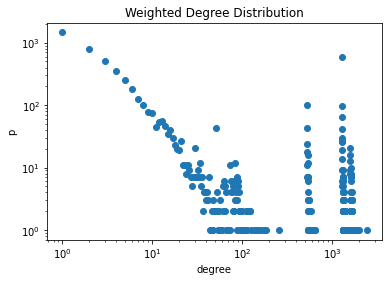

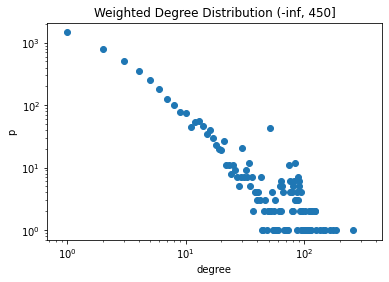

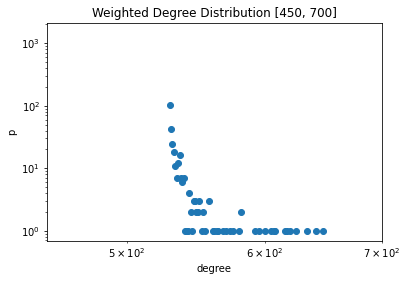

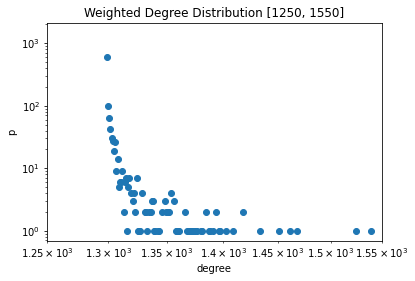

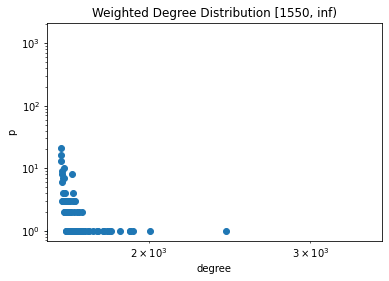

In [9]:
plot_weighted_degree_dist('Weighted Degree Distribution', G, log=True)
plot_weighted_degree_dist('Weighted Degree Distribution (-inf, 450]', G, log=True, right=450)
plot_weighted_degree_dist('Weighted Degree Distribution [450, 700]', G, log=True, left=450, right=700)
plot_weighted_degree_dist('Weighted Degree Distribution [1250, 1550]', G, log=True, left=1250, right=1550)
plot_weighted_degree_dist('Weighted Degree Distribution [1550, inf)', G, log=True, left=1550)


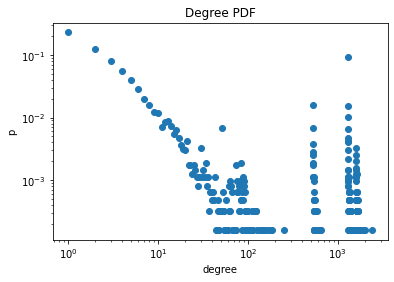

In [27]:
plot_degree_pdf('Degree PDF', G, log=True)

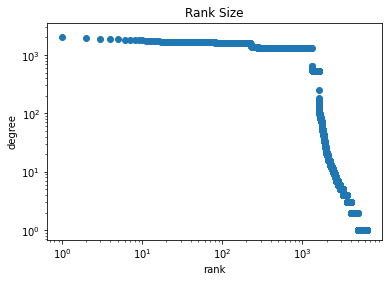

In [28]:
plot_rank_frequency('Rank Size', G)

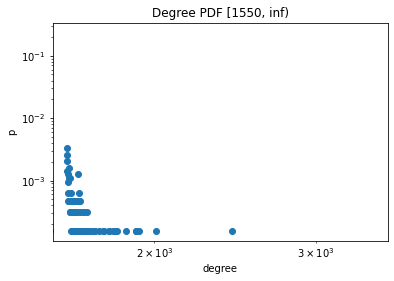

In [41]:
plot_degree_pdf('Degree PDF [1550, inf)', G, log=True, left=1550)

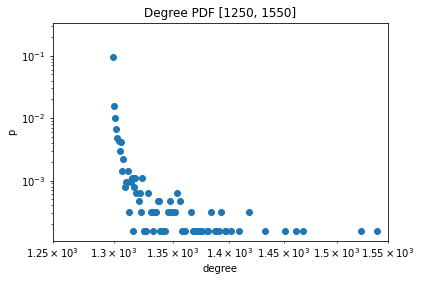

In [42]:
plot_degree_pdf('Degree PDF [1250, 1550]', G, log=True, left=1250, right=1550)

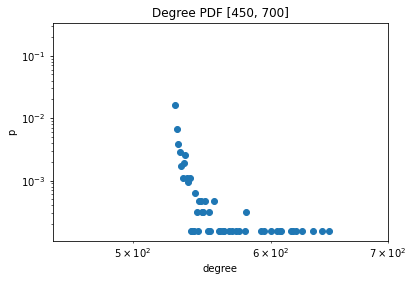

In [43]:
plot_degree_pdf('Degree PDF [450, 700]', G, log=True, left=450, right=700)

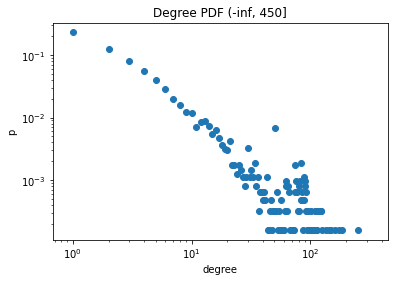

In [44]:
plot_degree_pdf('Degree PDF (-inf, 450]', G, log=True, right=450)

In [11]:
H = nx.read_gexf('political_subreddit_network.gexf')

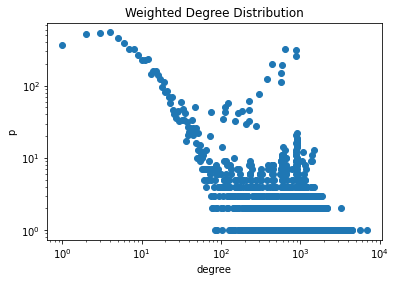

In [14]:
plot_weighted_degree_dist('Weighted Degree Distribution', H, log=True)